In [5]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import cv2
import numpy as np
import csv

#Import image
impatch = "TolC251-1.tiff"
im = Image.open(impatch)

#Set to array
imarray = np.array(im)

(1024, 1024, 3)


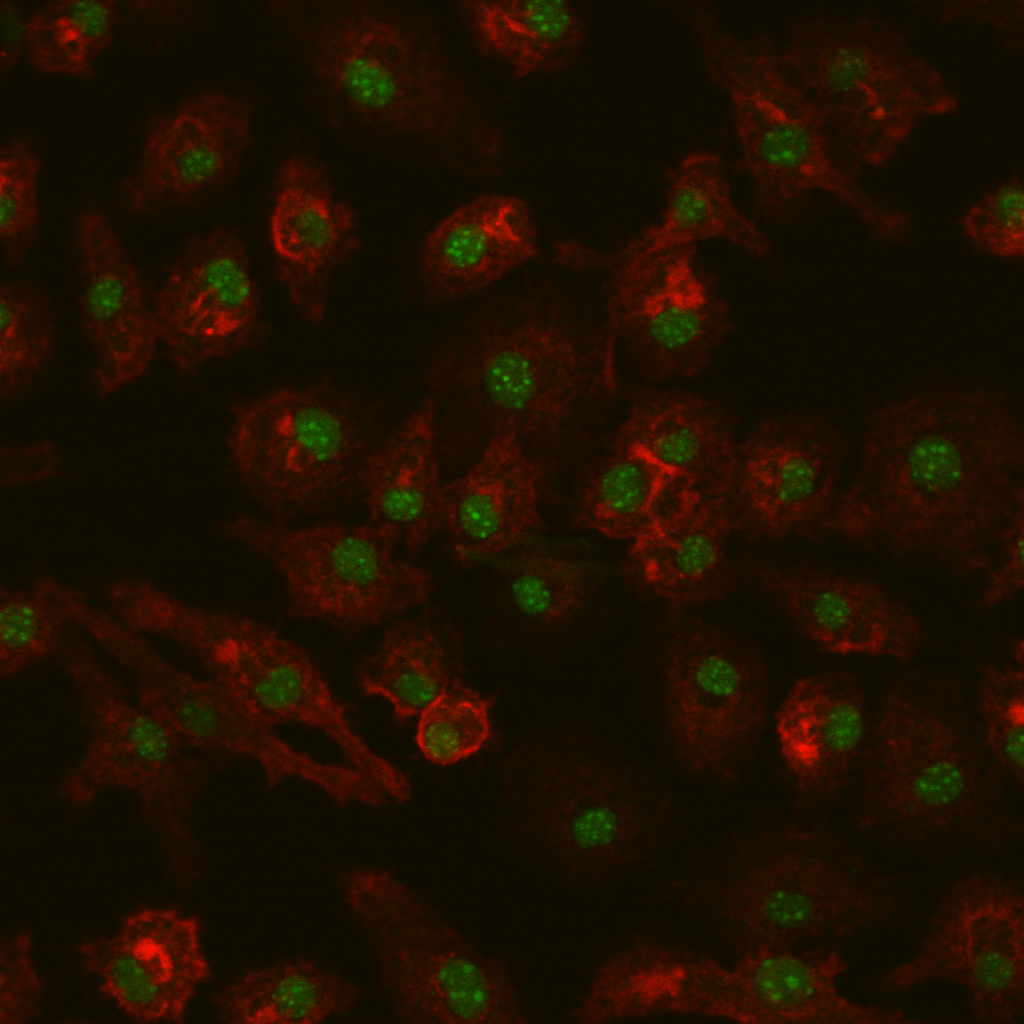

In [6]:
#Show array shape&image
print(imarray.shape)
Image.fromarray(imarray)

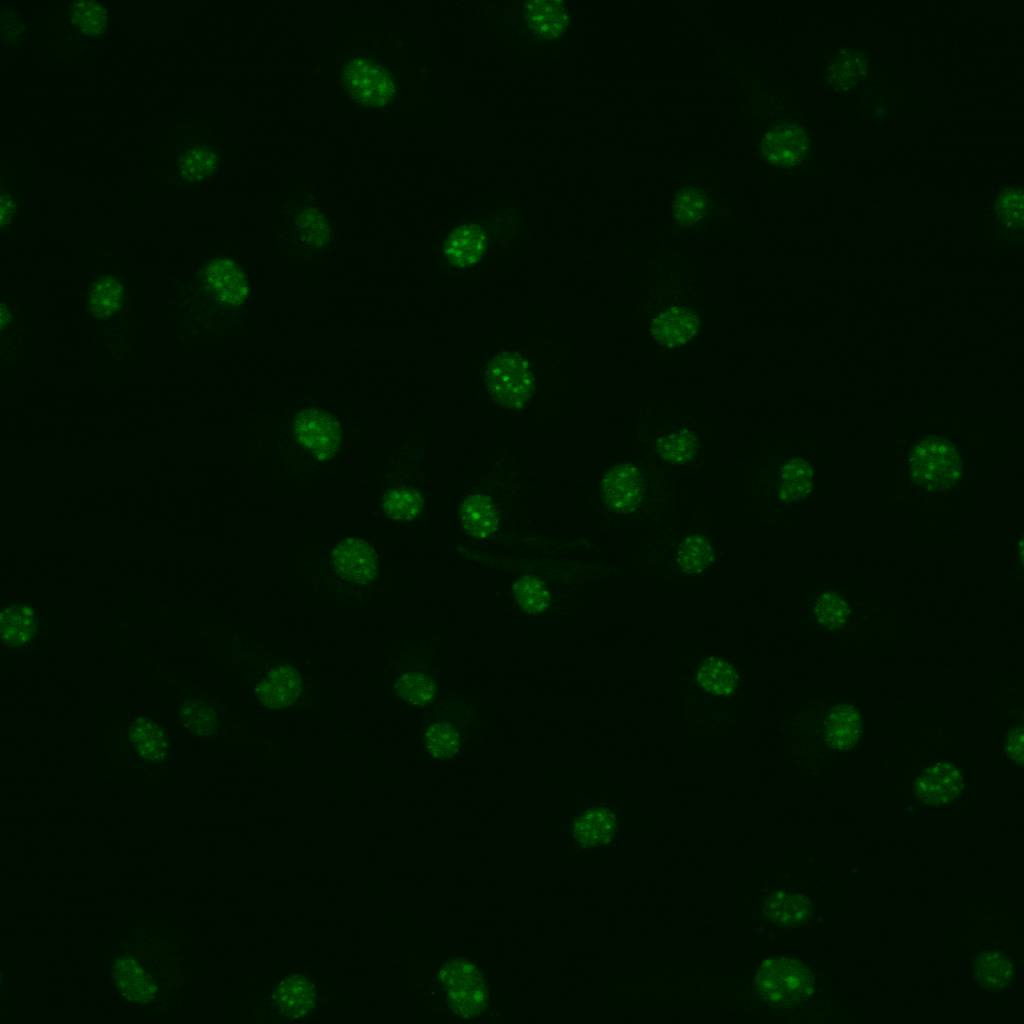

In [7]:
#Delete R B color
gimarray = imarray.copy()
gimarray[:, :, 0] = 0
gimarray[:, :, 2] = 0

Image.fromarray(gimarray)

(2099200,)
16.024157774390243
33637912
(1024, 4102, 3)


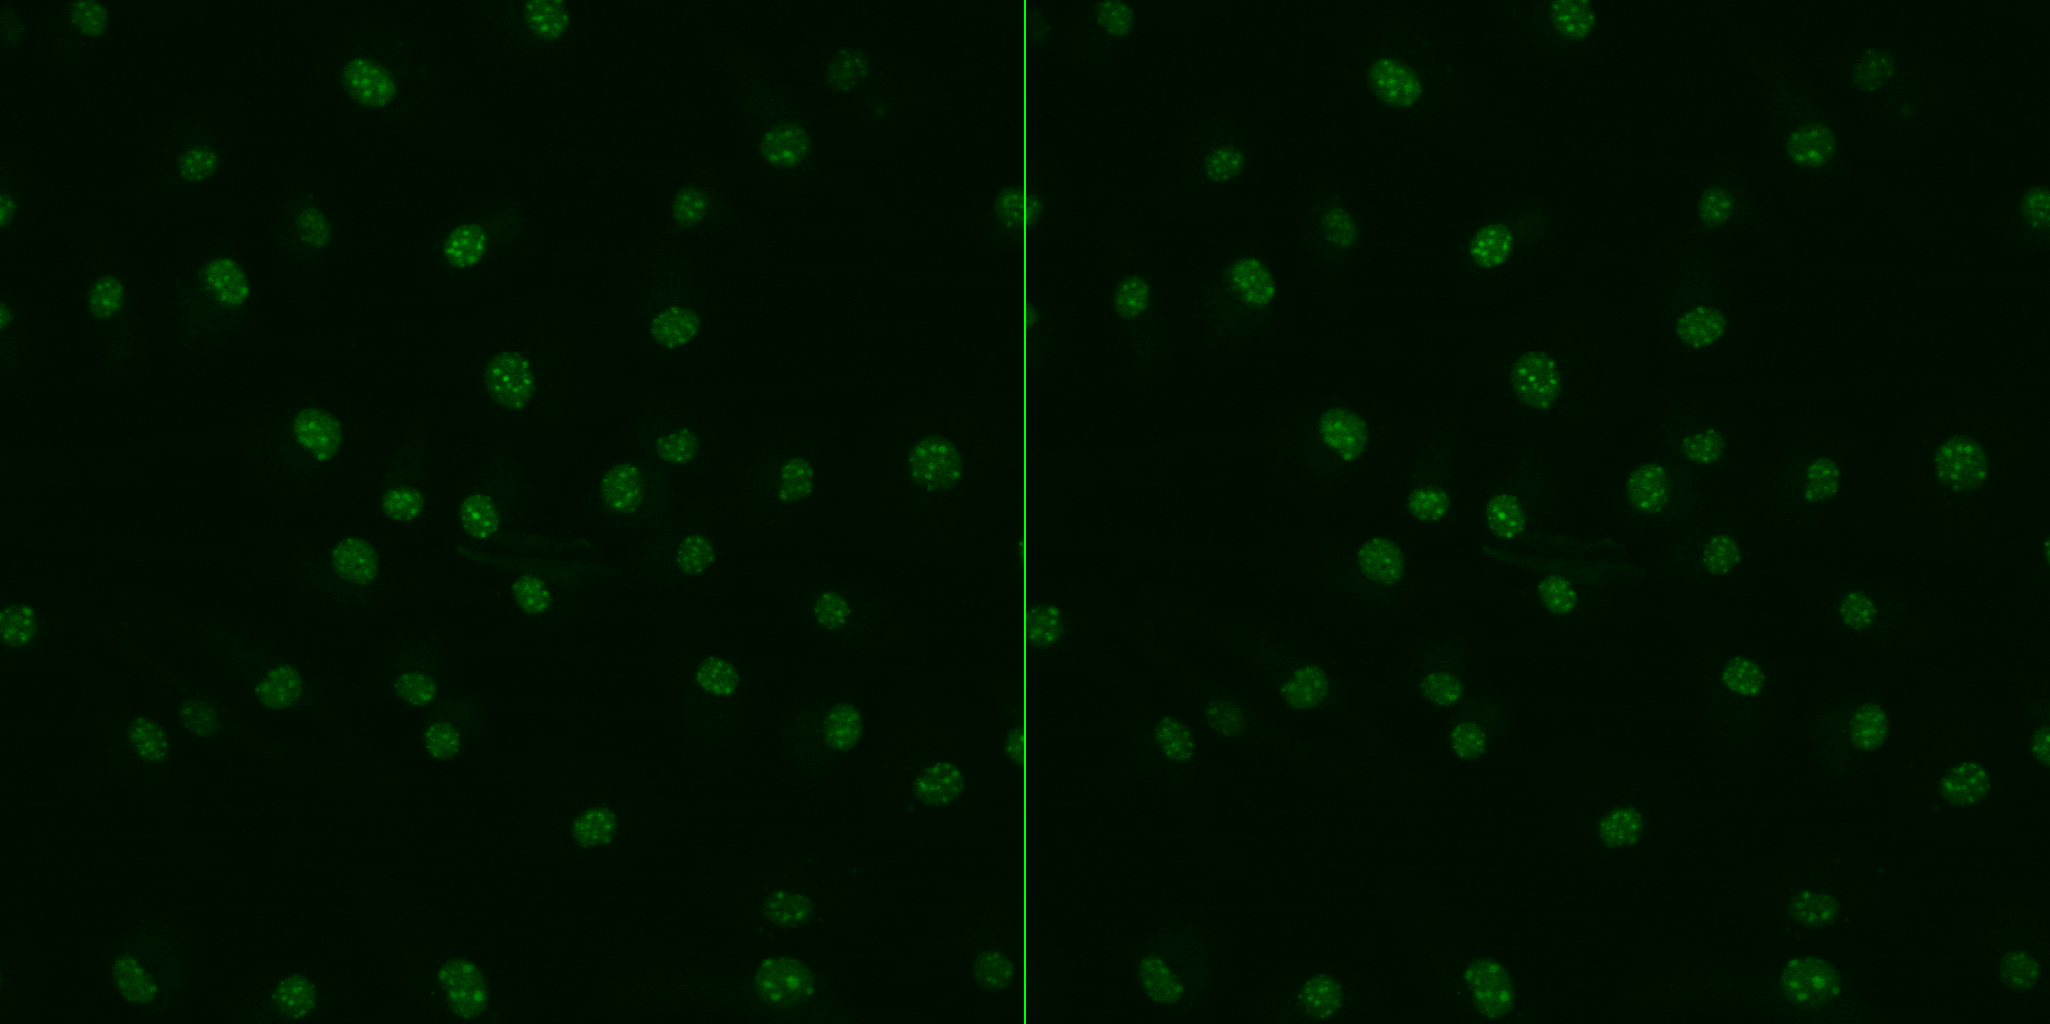

In [4]:
#Delete R B color
gimarray = imarray.copy()
gimarray[:, :, 0] = 0
gimarray[:, :, 2] = 0

#Fillter noise
#gimarray[gimarray < 30] = 0

#Split G color array
gareaimarray = gimarray[:, :, 1]
cvgareaimarray = gareaimarray.copy() #Bufer for cv process
cvgareaimarray[cvgareaimarray > 0] = 100 #Set to plain gray scale

#Calculate intentsive of green area
gareaimarray = gareaimarray[gareaimarray > 0]
print(gareaimarray.shape)
print(gareaimarray.mean())
print(gareaimarray.sum())

#combine 2 image
imarray = np.concatenate((imarray, np.full((1024, 2, 3), 255, dtype="uint8"), gimarray), axis=1)
print(imarray.shape)
Image.fromarray(imarray)

In [343]:
#Draw text in photo
Finalim = Image.fromarray(imarray)
draw = ImageDraw.Draw(Finalim)
font = ImageFont.truetype('Montserrat-Black.ttf', 40)
draw.text((5, 5), str(gareaimarray.mean().round(2)), (255,255,255), font=font)

#Save image
#Finalim.save("Split" + impatch[:-5] + ".jpg")

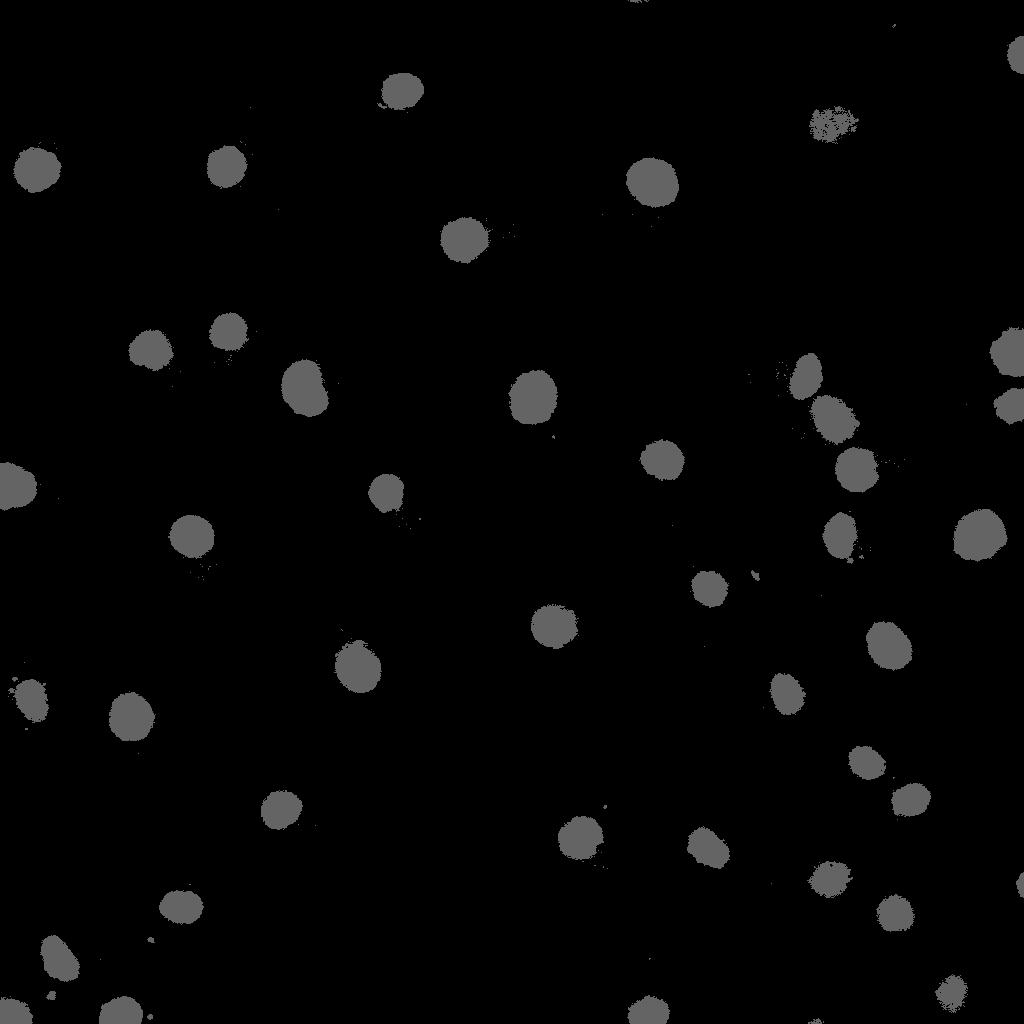

In [344]:
Image.fromarray(cvgareaimarray)

1
718.0
11.32 8125.11
2
1202.0
22.45 26984.27
3
998.0
15.81 15779.73
4
1102.0
23.86 26292.89
5
1047.0
14.21 14881.7
6
1149.5
17.1 19655.49
7
1444.0
17.48 25242.4
8
1170.0
19.07 22311.85
9
964.5
17.91 17269.61
10
891.0
16.69 14875.19
11
1660.5
23.52 39054.57
12
1050.0
15.42 16196.23
13
1021.0
16.52 16863.91
14
1739.0
18.61 32360.14
15
1614.0
21.36 34471.64
16
1519.5
18.87 28668.38
17
971.0
19.94 19366.45
18
1440.5
23.98 34543.02
19
1158.0
19.23 22266.49
20
2057.0
20.2 41547.13
21
1017.0
22.96 23351.75
22
1467.0
19.59 28741.87
23
1282.0
20.46 26235.75
24
1539.0
17.32 26648.5
25
2011.0
23.39 47033.59
26
1947.5
26.44 51483.33
27
1075.5
23.89 25695.77
28
1270.0
18.44 23422.0
29
1086.0
23.48 25504.65
30
1605.0
20.71 33236.91
31
1957.5
22.83 44684.83
32
1551.5
21.77 33777.39
33
1253.5
22.68 28433.72
34
1016.0
9.97 10128.96
35
1166.5
21.98 25634.23


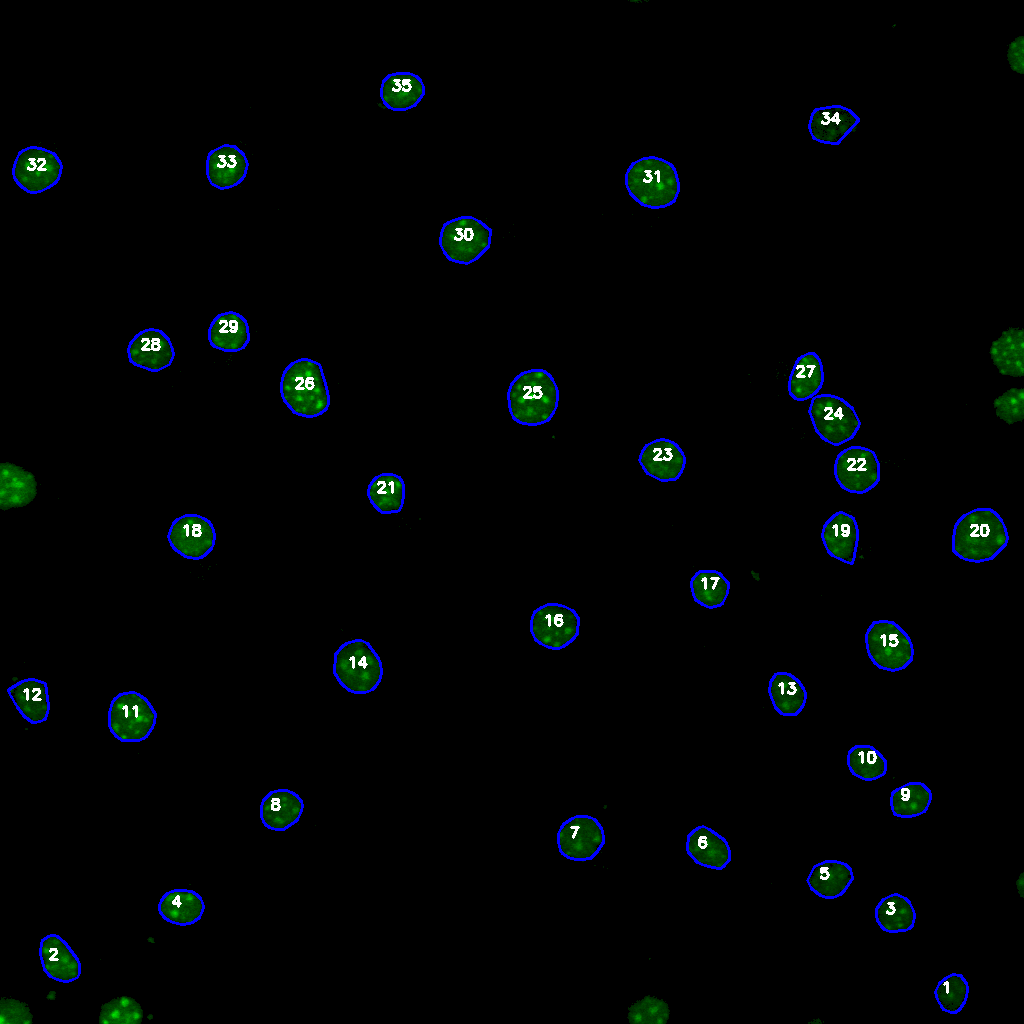

In [345]:
#edged = cv2.Canny(cvgareaimarray, 30, 200)

_, contours, _ = cv2.findContours(cvgareaimarray, 
                                  cv2.RETR_EXTERNAL, 
                                  cv2.CHAIN_APPROX_SIMPLE)

i = 1
for c in contours:
    
    cntarea = cv2.contourArea(c)
    
    if cntarea > 500 and 1023 not in c and 0 not in c: #Improve logic!!!
        
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
        hull = cv2.convexHull(c)
        
        #Calculate Mean, IntDen
        mask = np.zeros(cvgareaimarray.shape, np.uint8)
        cv2.drawContours(mask, [hull], 0, 255, -1)
        mean_val = cv2.mean(gimarray, mask=mask)[1]
        print(i)
        print(cntarea)
        print(round(mean_val/3, 2), round(mean_val*cntarea/3, 2))
        
        #Draw Hull, Number
        cv2.drawContours(gimarray, [hull], 0, (0, 0, 255), 2)
        cv2.putText(gimarray, str(i), (cX - 10, cY), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
        i = i + 1
         

Image.fromarray(gimarray)


19
[[[856.5 469.5  22.1]
  [225.5 166.5  20.2]
  [360.5 666.5  25.7]
  [387.5 492.5  18.5]
  [463.5 236.5  25. ]
  [830.5 119.5  19.1]
  [184.5 906.5  17.1]
  [ 32.5 170.5  19.4]
  [281.5 807.5  18.2]
  [189.5 538.5  24.3]
  [ 31.5 699.5  20.2]
  [583.5 834.5  18.8]
  [403.5  89.5  18.2]
  [ 60.5 960.5  18.3]
  [806.5 382.5  18. ]
  [652.5 186.5  20.4]
  [548.5 625.5  19.1]
  [784.5 685.5  14. ]
  [898.5 647.5  13. ]]]


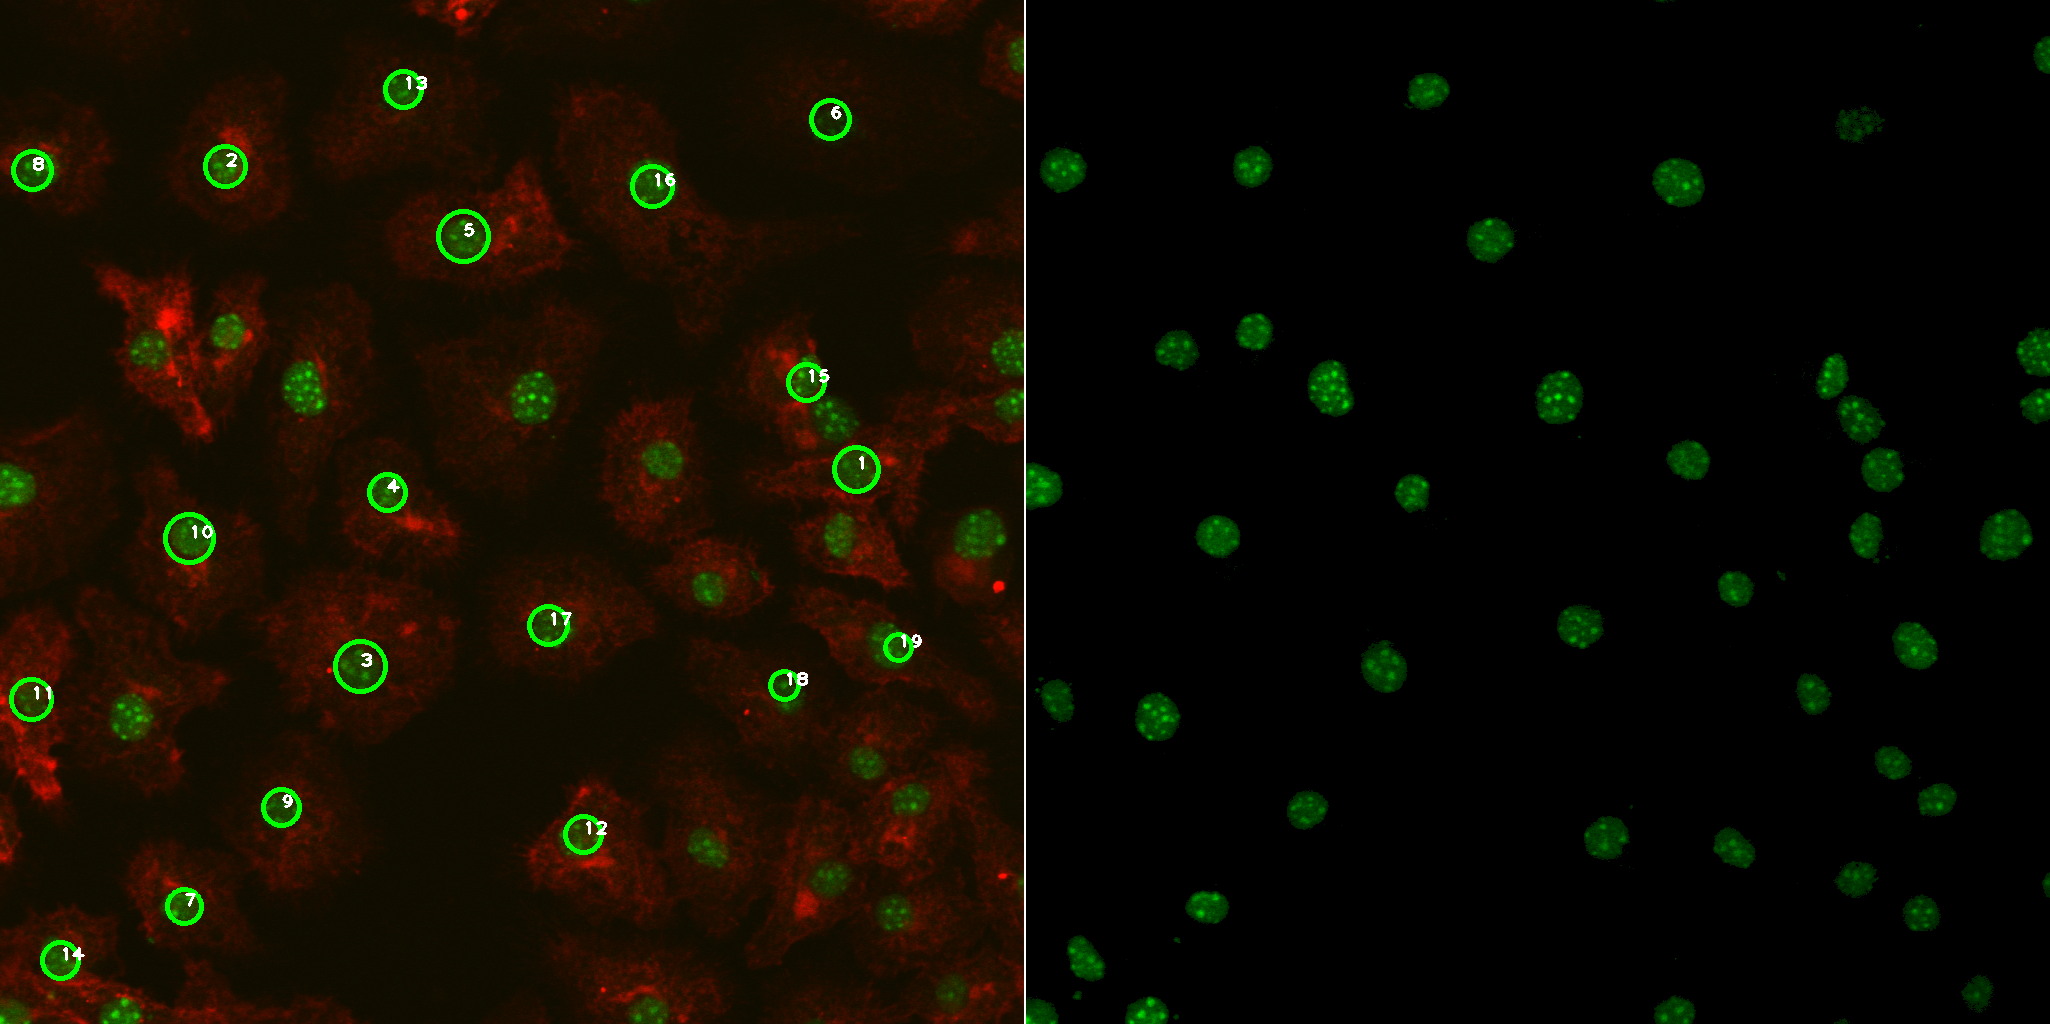

In [346]:
circles = cv2.HoughCircles(cvgareaimarray,
                           cv2.HOUGH_GRADIENT,
                           minDist=35,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=12,
                           maxRadius=30)
print(circles.shape[1])
print(circles)

i = 0
for (x, y, r) in circles[0, :, :]:
    i = i + 1
    cv2.circle(imarray, (x, y), r, (0, 255, 0), 4)
    cv2.putText(imarray,str(i), (x,y), cv2.FONT_HERSHEY_PLAIN, fontScale=1.2,
                color=(255, 255, 255), thickness=2)
    
Image.fromarray(imarray)